In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
file_path = r"d:\Data Analyst\File excel\video_games_sales.csv"  # Ganti dengan path file Anda
df = pd.read_csv(file_path)


In [4]:
# Tampilkan beberapa baris pertama
print(df.head())

   rank                      name platform    year         genre publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   na_sales  eu_sales  jp_sales  other_sales  global_sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
# Cek ukuran dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 16598 baris dan 11 kolom.


In [6]:
# Info data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [7]:
# Cek nilai hilang
missing_values = df.isnull().sum()
print("Nilai hilang di setiap kolom:")
print(missing_values)

Nilai hilang di setiap kolom:
rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64


In [8]:
# Mengisi nilai hilang di kolom year dengan median
df['year'] = df['year'].fillna(df['year'].median())
# Mengisi nilai hilang di kolom publisher dengan "Unknown Publisher"
df['publisher'] = df['publisher'].fillna("Unknown Publisher")

In [9]:
# Periksa kembali nilai hilang
print("Nilai hilang setelah penanganan:")
print(df.isnull().sum())


Nilai hilang setelah penanganan:
rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64


In [10]:
# Statistik deskriptif untuk kolom numerik
print("Statistik deskriptif:")
print(df.describe())

Statistik deskriptif:
               rank          year      na_sales      eu_sales      jp_sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        other_sales  global_sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.0

==============VISUALISASI============================

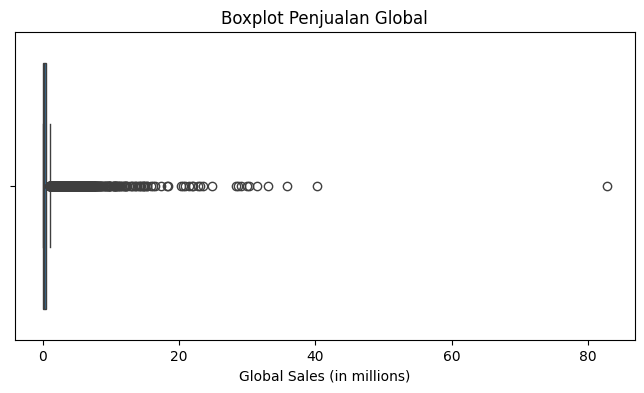

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['global_sales'])
plt.title("Boxplot Penjualan Global")
plt.xlabel("Global Sales (in millions)")
plt.show()

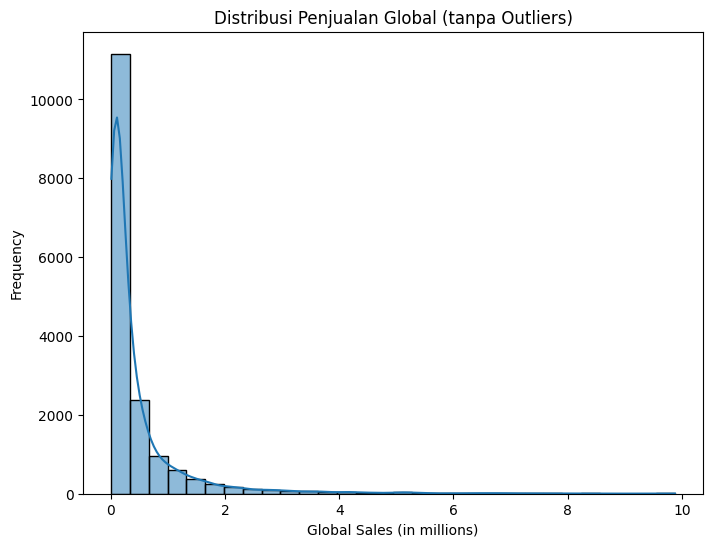

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['global_sales'] < 10]['global_sales'], kde=True, bins=30)
plt.title("Distribusi Penjualan Global (tanpa Outliers)")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.show()

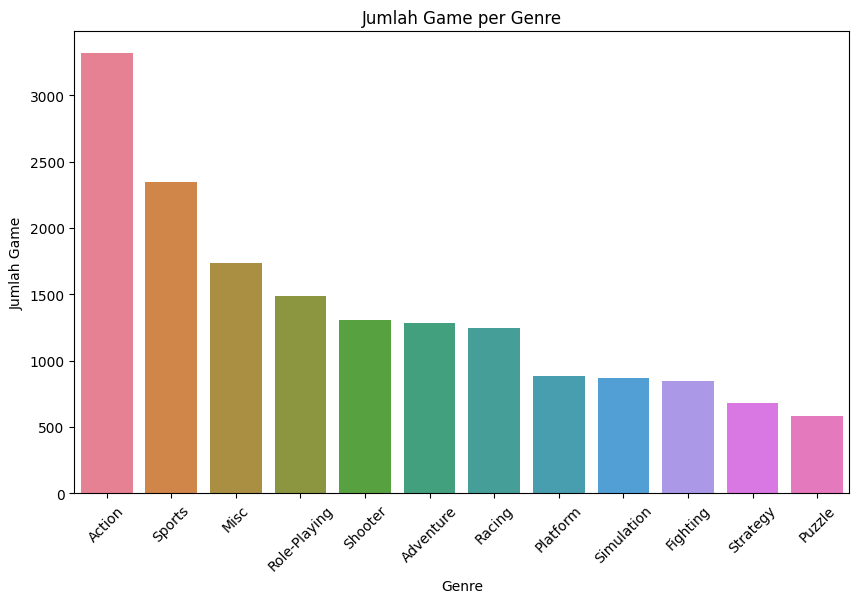

In [ ]:
# Jumlah game per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, dodge=False)
plt.title("Jumlah Game per Genre")
plt.xlabel("Genre")
plt.ylabel("Jumlah Game")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False) 
plt.show()


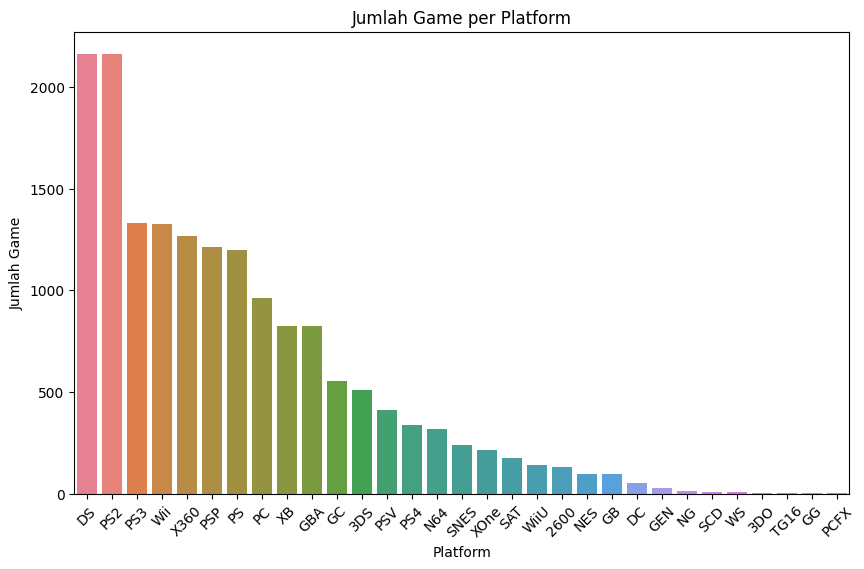

In [ ]:
# Jumlah game per platform
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, hue=platform_counts.index, dodge=False)
plt.title("Jumlah Game per Platform")
plt.xlabel("Platform")
plt.ylabel("Jumlah Game")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()


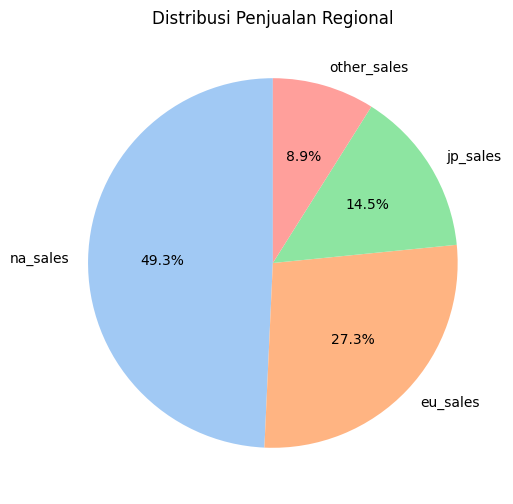

In [ ]:
# Perbandingan penjualan regional
regional_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure(figsize=(8, 6))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribusi Penjualan Regional")
plt.ylabel("")
plt.show()


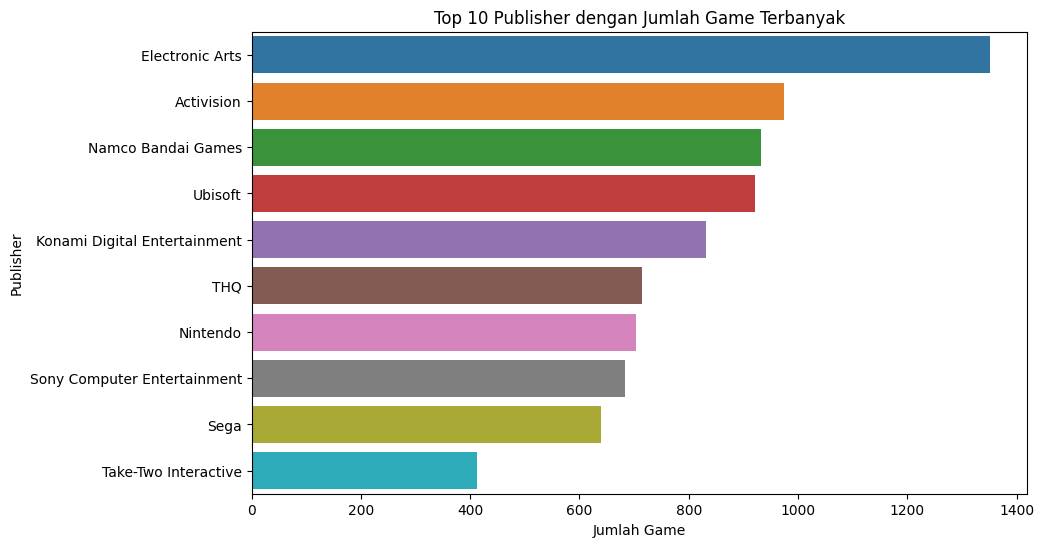

In [ ]:
# Publisher dengan jumlah game terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, hue=top_publishers.index, dodge=False)
plt.title("Top 10 Publisher dengan Jumlah Game Terbanyak")
plt.xlabel("Jumlah Game")
plt.ylabel("Publisher")
plt.legend([],[], frameon=False)
plt.show()

Top 5 Game dengan Penjualan Global Tertinggi:
                       name  global_sales
0                Wii Sports         82.74
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.82
3         Wii Sports Resort         33.00
4  Pokemon Red/Pokemon Blue         31.37


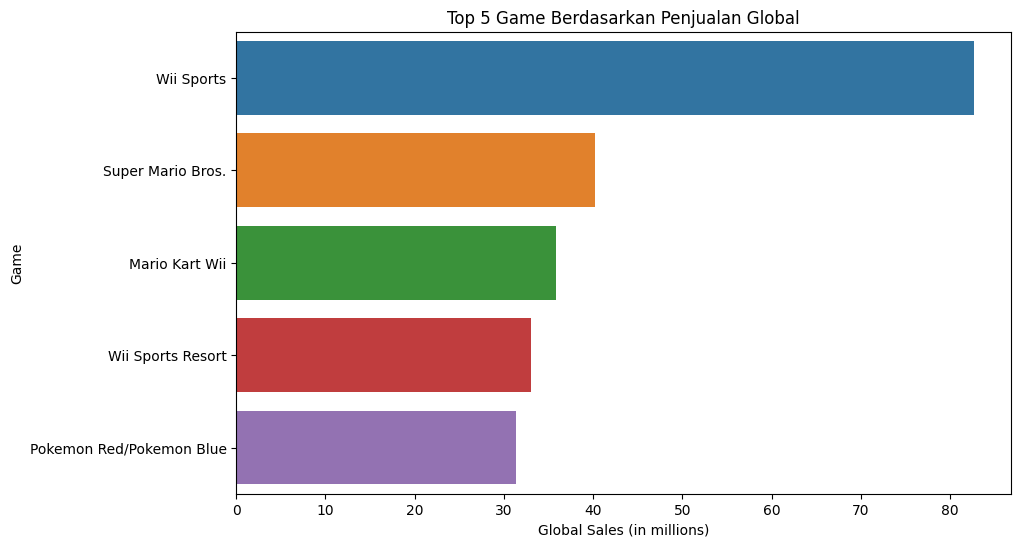

In [26]:
# Sortir data berdasarkan global_sales
top_5_games = df.sort_values(by='global_sales', ascending=False).head(5)

# Tampilkan Top 5 Game
print("Top 5 Game dengan Penjualan Global Tertinggi:")
print(top_5_games[['name', 'global_sales']])


# Visualisasi Top 5 Game
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_5_games['global_sales'], 
    y=top_5_games['name'], 
    hue=top_5_games['name'],  # Atur hue sesuai dengan sumbu y
    dodge=False
)
plt.legend([],[], frameon=False)  # Sembunyikan legend
plt.title("Top 5 Game Berdasarkan Penjualan Global")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game")
plt.show()


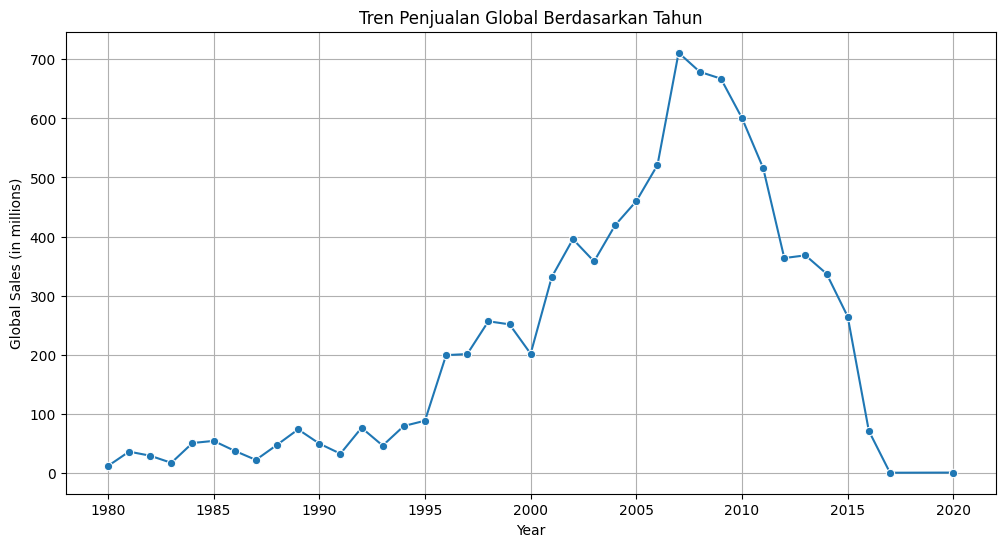

In [27]:
yearly_sales = df.groupby('year')['global_sales'].sum().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title("Tren Penjualan Global Berdasarkan Tahun")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.show()